# `dicom` to `array` tutorial

In [40]:
import os
import numpy as np
import pydicom # !pip install pydicom


def load_dicom_images_as_numpy(folder_path: str):
    """
    Load DICOM images from a folder, preprocess them, and convert to a numpy array.

    Args:
    folder_path (str): Path to the folder containing DICOM files.

    Returns:
    numpy.ndarray: An array containing all the preprocessed DICOM images.
    """

    images = []
    ids = []

    # Iterate over the DICOM files
    for filename in os.listdir(folder_path):
        if filename.lower().endswith('.dcm'):
            id = filename.split('_')[-3]
            ids.append(id)
            filepath = os.path.join(folder_path, filename)
            dicom_data = pydicom.dcmread(filepath)
            image = dicom_data.pixel_array
            image = image[100:320, 100:300] # cropping
            images.append(image)

    # Sorting images with respect to their ids
    sorted_pairs = sorted(zip(ids, images), key=lambda x: x[0])
    sorted_ids, sorted_images = zip(*sorted_pairs)

    # Stack all the images into a single numpy array
    numpy_images = np.stack(sorted_images)

    return numpy_images

In [41]:
def normalize(dicom_array):
    max_val = np.max(dicom_array)
    min_val = np.min(dicom_array)
    return (dicom_array - min_val) / (max_val - min_val)

In [42]:
# .dcm 파일들이 저장되어있는 디렉토리의 경로를 str 타입 변수로 정의
dicom_directory = 'data/ADNI_sort_part6/941_S_6044/PET_Brain_-_DYNAMIC_4X5MIN/2021-11-10_14_05_03.0/I1515093/'

# load_dicom_images_as_numpy는 dir 내의 dcm 파일을 순회하며 (num_of_dcms, height, width) 쉐입의 array로 저장합니다.
dicom_array = load_dicom_images_as_numpy(dicom_directory)
dicom_array.shape

(324, 220, 200)

In [43]:
normalized_dicom_array = normalize(dicom_array)

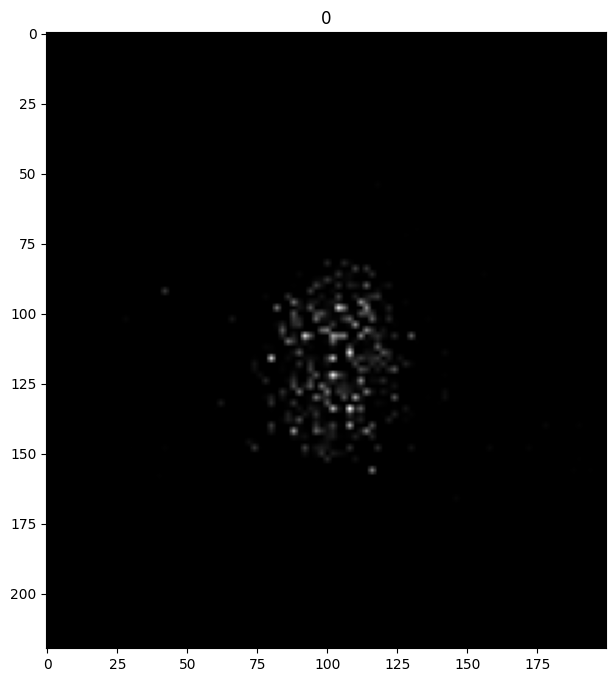

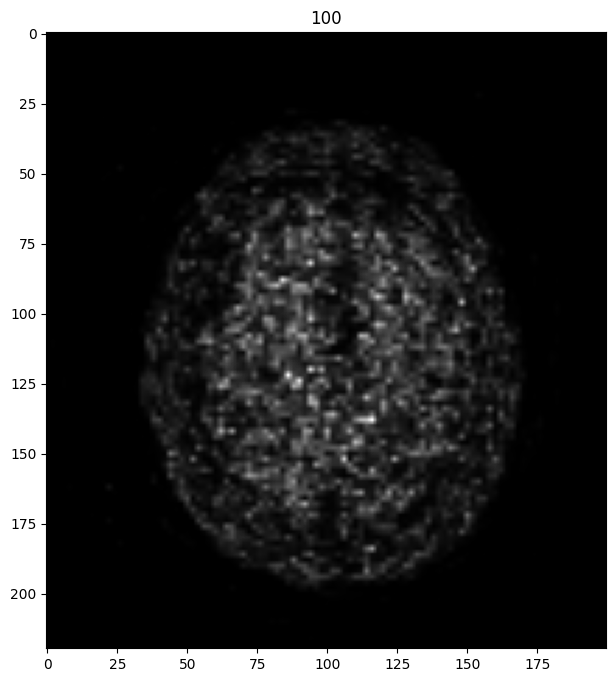

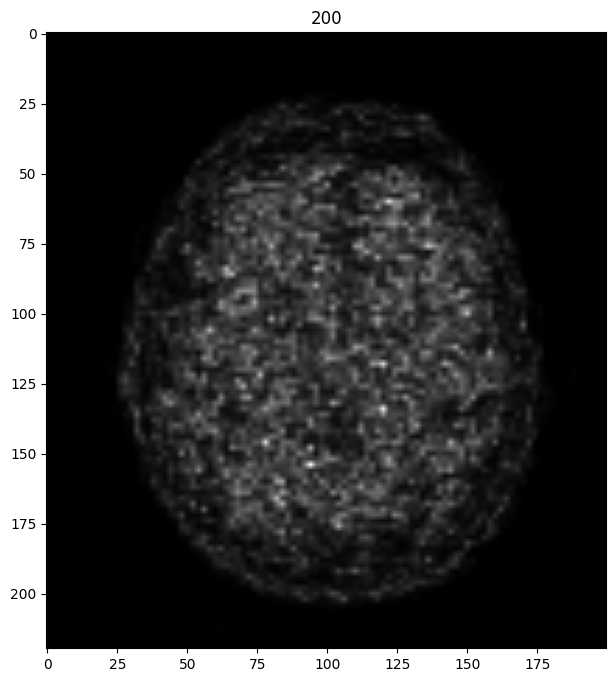

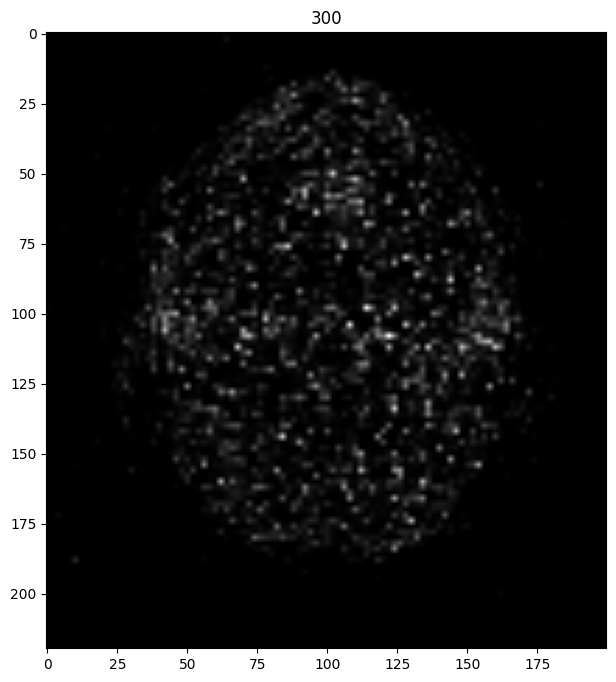

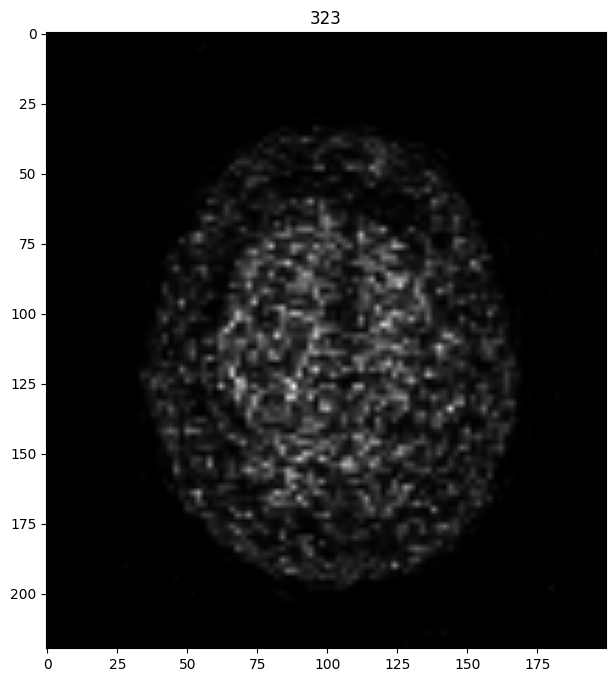

In [44]:
import matplotlib.pyplot as plt

steps = [0, 100, 200, 300, 323]

for step in steps:
    plt.figure(figsize=(8,8))
    plt.imshow(normalized_dicom_array[step], cmap='gray')
    plt.title(f'{step}')

In [45]:
import imageio # pip install imageio

def create_dicom_gif(dicom_array, filename, duration=0.1):
    frames = []
    for i in range(len(dicom_array)):
        # 이미지를 흑백으로 변환하여 프레임에 추가
        frame = (dicom_array[i] * 255)
        frames.append(frame)

    # 프레임들을 GIF로 변환
    imageio.mimsave(filename, frames, 'GIF', duration=duration)

create_dicom_gif(normalized_dicom_array, filename='test.gif', duration=5.0)